In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import datetime


In [2]:
# Download VADER sentiment lexicon (needed for SentimentIntensityAnalyzer)
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
# Load the dataset
df = pd.read_csv('climate_nasa.csv')
df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [5]:
# Basic dataset shape and columns
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns.tolist())


Shape of dataset: (522, 5)

Columns:
 ['date', 'likesCount', 'profileName', 'commentsCount', 'text']


In [6]:
# Data types and missing values summary
print("\nInfo:")
print(df.info())

print("\nMissing values per column:\n", df.isnull().sum())




Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None

Missing values per column:
 date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64


In [7]:
# Summary statistics for numeric columns
print(df.describe())


       likesCount  commentsCount
count  522.000000     244.000000
mean     4.720307       8.696721
std     12.053556      12.266176
min      0.000000       1.000000
25%      0.000000       2.000000
50%      1.000000       5.000000
75%      4.000000      10.000000
max    126.000000      93.000000


In [8]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check date range
print("Date range:", df['date'].min(), "to", df['date'].max())


Date range: 2020-09-15 21:25:05+00:00 to 2023-12-25 13:34:39+00:00


In [9]:
# Create new features: comment length and word count
df['comment_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

# Quick check
print(df[['comment_length', 'word_count']].head())


   comment_length  word_count
0             173          32
1              51           8
2             108          16
3              94          19
4             128          24


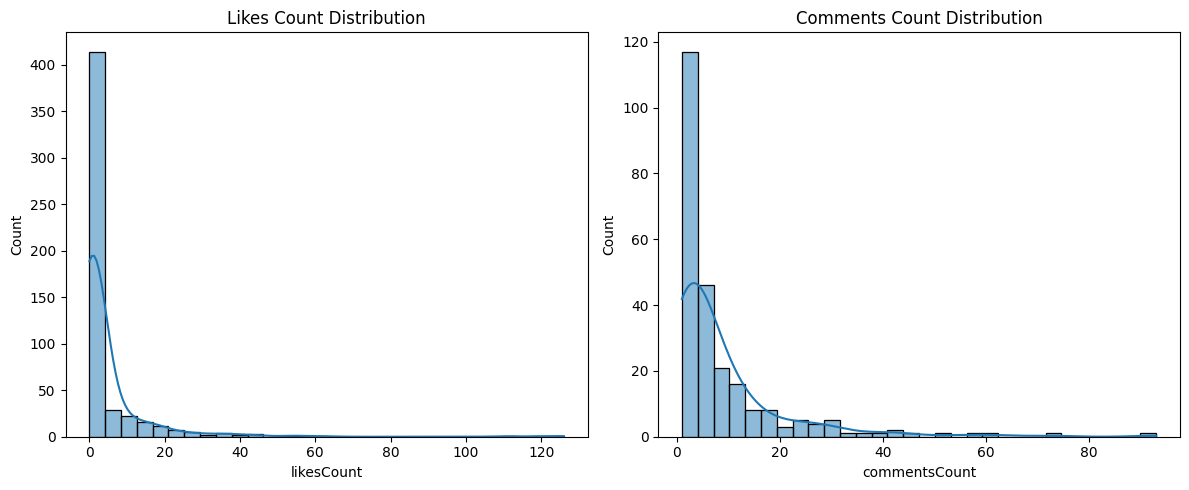

In [10]:
# Plot LikesCount and CommentsCount distribution
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['likesCount'], bins=30, kde=True)
plt.title('Likes Count Distribution')

plt.subplot(1,2,2)
sns.histplot(df['commentsCount'], bins=30, kde=True)
plt.title('Comments Count Distribution')

plt.tight_layout()
plt.show()


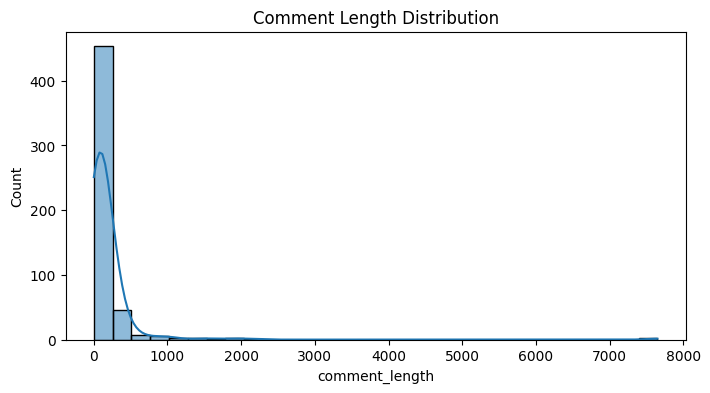

In [11]:
# Plot distribution of comment lengths
plt.figure(figsize=(8,4))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title('Comment Length Distribution')
plt.show()


/tmp/ipython-input-12-144200161.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['likesCount'].sum().plot(label='Likes')
/tmp/ipython-input-12-144200161.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['commentsCount'].sum().plot(label='Comments')


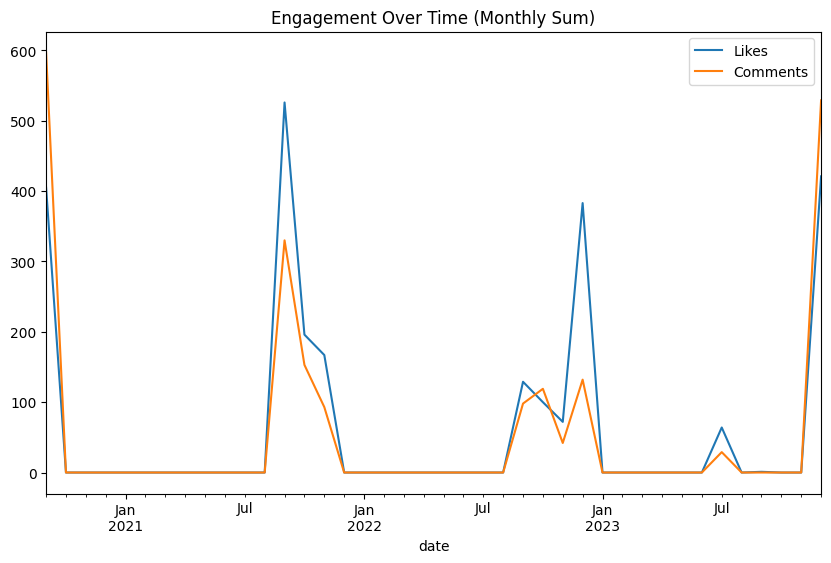

In [12]:
# Likes and comments over time (monthly sum)
plt.figure(figsize=(10,6))
df.set_index('date').resample('M')['likesCount'].sum().plot(label='Likes')
df.set_index('date').resample('M')['commentsCount'].sum().plot(label='Comments')
plt.legend()
plt.title('Engagement Over Time (Monthly Sum)')
plt.show()



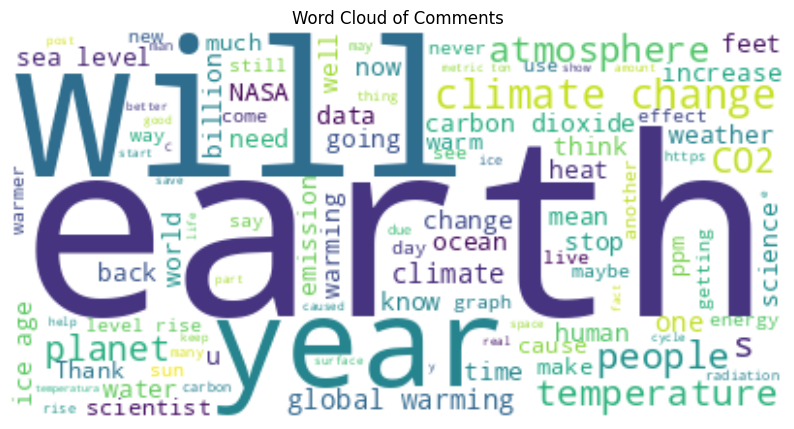

In [13]:
# Generate a word cloud from all comments
text_corpus = ' '.join(df['text'].dropna().astype(str))
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(text_corpus)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()


In [14]:
# Apply VADER sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['text'].astype(str).apply(lambda x: sid.polarity_scores(x)['compound'])

# Preview
print(df[['text', 'sentiment_score']].head())


                                                text  sentiment_score
0  Neat comparison I have not heard it before.\n ...           0.7702
1  An excellent way to visualise the invisible! T...           0.7840
2  Does the CO2/ghg in the troposphere affect the...           0.3736
3  excellent post! I defo feel the difference - o...           0.1759
4  Yes, and carbon dioxide does not harm the Eart...           0.6059


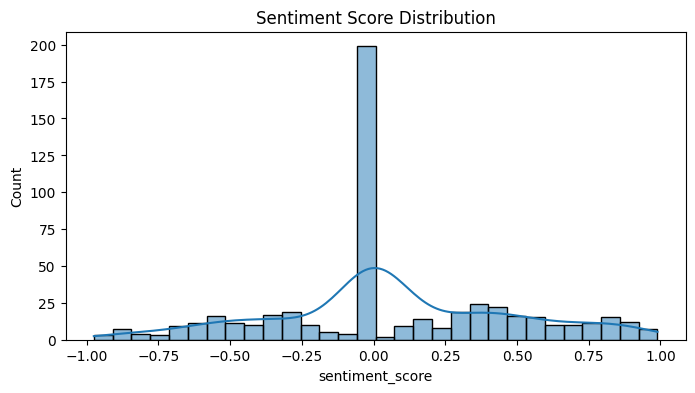

In [15]:
# Plot sentiment score distribution
plt.figure(figsize=(8,4))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.show()


/tmp/ipython-input-16-1642207243.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date').resample('M')['sentiment_score'].mean().plot()


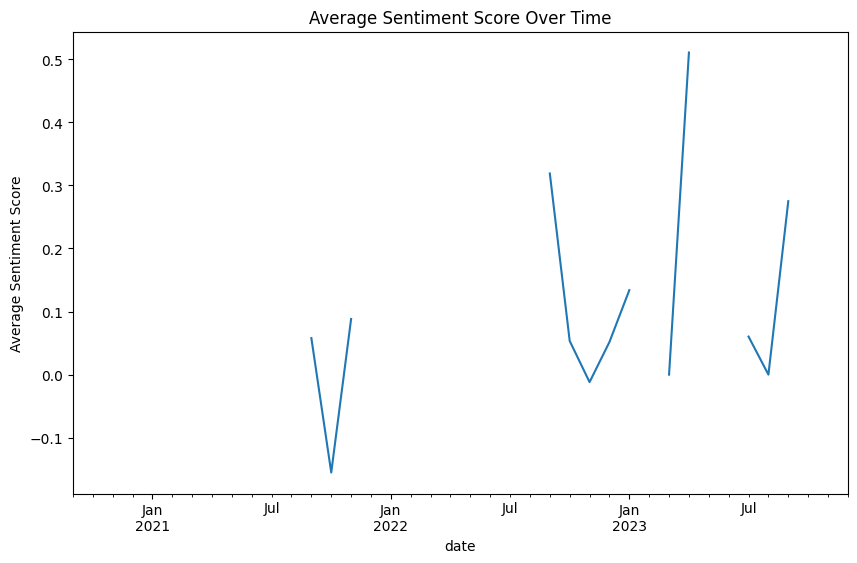

In [16]:
# Plot average sentiment score over time (monthly)
plt.figure(figsize=(10,6))
df.set_index('date').resample('M')['sentiment_score'].mean().plot()
plt.title('Average Sentiment Score Over Time')
plt.ylabel('Average Sentiment Score')
plt.show()


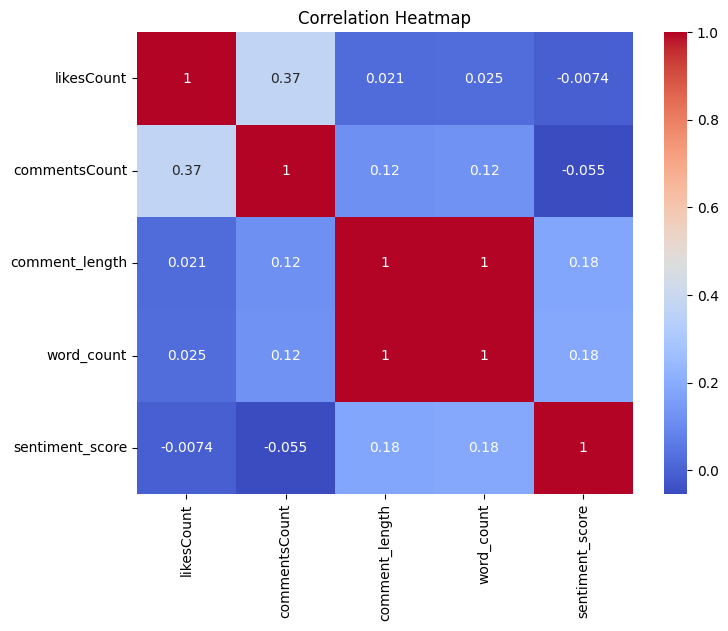

In [17]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['likesCount', 'commentsCount', 'comment_length', 'word_count', 'sentiment_score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Check missing values again to summarize
missing_summary = df.isnull().sum()
print(missing_summary)


date                 0
likesCount           0
profileName          0
commentsCount      278
text                18
comment_length       0
word_count           0
sentiment_score      0
dtype: int64


In [19]:
# Fill missing commentsCount with 0 (assume no replies if missing)
df['commentsCount'] = df['commentsCount'].fillna(0)

# Verify
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 date                0
likesCount          0
profileName         0
commentsCount       0
text               18
comment_length      0
word_count          0
sentiment_score     0
dtype: int64


In [20]:
# Apply log1p (log(1 + x)) to handle 0 values safely
df['log_likes'] = np.log1p(df['likesCount'])
df['log_comments'] = np.log1p(df['commentsCount'])

# Quick stats
print(df[['likesCount', 'log_likes', 'commentsCount', 'log_comments']].head())


   likesCount  log_likes  commentsCount  log_comments
0           2   1.098612            0.0      0.000000
1           0   0.000000            0.0      0.000000
2           1   0.693147            3.0      1.386294
3           4   1.609438            0.0      0.000000
4          16   2.833213           26.0      3.295837


In [21]:
# Extract time-based features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = df['date'].dt.hour

# Preview
print(df[['date', 'year', 'month', 'day_of_week', 'hour']].head())


                       date  year  month  day_of_week  hour
0 2022-09-07 17:12:32+00:00  2022      9            2    17
1 2022-09-08 14:51:13+00:00  2022      9            3    14
2 2022-09-07 17:19:41+00:00  2022      9            2    17
3 2022-09-08 00:51:30+00:00  2022      9            3     0
4 2022-09-07 19:06:20+00:00  2022      9            2    19


In [22]:
# Categorize sentiment: -1 = negative, 0 = neutral, 1 = positive
def sentiment_label(score):
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return -1
    else:
        return 0

df['sentiment_category'] = df['sentiment_score'].apply(sentiment_label)

# Preview
print(df[['text', 'sentiment_score', 'sentiment_category']].head())


                                                text  sentiment_score  \
0  Neat comparison I have not heard it before.\n ...           0.7702   
1  An excellent way to visualise the invisible! T...           0.7840   
2  Does the CO2/ghg in the troposphere affect the...           0.3736   
3  excellent post! I defo feel the difference - o...           0.1759   
4  Yes, and carbon dioxide does not harm the Eart...           0.6059   

   sentiment_category  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


sentiment_category
-1    130
 0    199
 1    193
Name: count, dtype: int64


/tmp/ipython-input-23-3584868538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


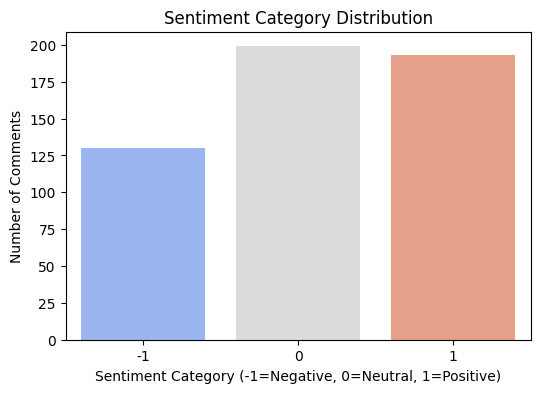

In [23]:
# Count sentiment categories
sentiment_counts = df['sentiment_category'].value_counts().sort_index()
print(sentiment_counts)

# Visualize
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.xlabel('Sentiment Category (-1=Negative, 0=Neutral, 1=Positive)')
plt.ylabel('Number of Comments')
plt.title('Sentiment Category Distribution')
plt.show()


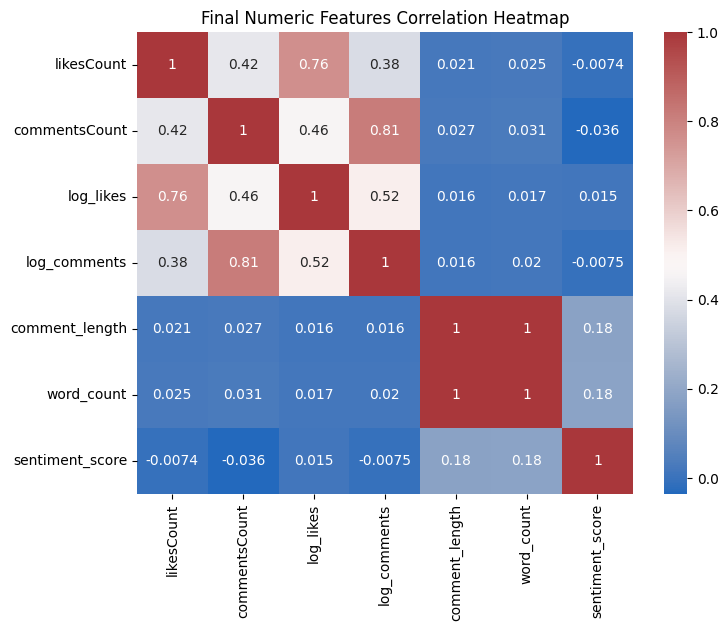

In [24]:
# Correlation heatmap of numeric features
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['likesCount', 'commentsCount', 'log_likes', 'log_comments',
        'comment_length', 'word_count', 'sentiment_score']].corr(),
    annot=True,
    cmap='vlag'
)
plt.title('Final Numeric Features Correlation Heatmap')
plt.show()


In [25]:
# Select features for modeling
model_df = df[[
    'likesCount', 'commentsCount', 'log_likes', 'log_comments',
    'comment_length', 'word_count',
    'year', 'month', 'day_of_week', 'hour',
    'sentiment_score', 'sentiment_category'
]]

# Show a sample
print(model_df.head())


   likesCount  commentsCount  log_likes  log_comments  comment_length  \
0           2            0.0   1.098612      0.000000             173   
1           0            0.0   0.000000      0.000000              51   
2           1            3.0   0.693147      1.386294             108   
3           4            0.0   1.609438      0.000000              94   
4          16           26.0   2.833213      3.295837             128   

   word_count  year  month  day_of_week  hour  sentiment_score  \
0          32  2022      9            2    17           0.7702   
1           8  2022      9            3    14           0.7840   
2          16  2022      9            2    17           0.3736   
3          19  2022      9            3     0           0.1759   
4          24  2022      9            2    19           0.6059   

   sentiment_category  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


In [26]:
# Shape and data types check
print("Final dataset shape:", model_df.shape)
print("\nData types:")
print(model_df.dtypes)


Final dataset shape: (522, 12)

Data types:
likesCount              int64
commentsCount         float64
log_likes             float64
log_comments          float64
comment_length          int64
word_count              int64
year                    int32
month                   int32
day_of_week             int32
hour                    int32
sentiment_score       float64
sentiment_category      int64
dtype: object


In [27]:
from sklearn.model_selection import train_test_split

# Features to use
X_cls = model_df.drop(columns=['sentiment_category'])
y_cls = model_df['sentiment_category']

# Split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print("Train set size:", X_train_cls.shape)
print("Test set size:", X_test_cls.shape)


Train set size: (417, 11)
Test set size: (105, 11)


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)

print("Random Forest classifier trained.")


Random Forest classifier trained.


Accuracy: 1.0000
Weighted F1 Score: 1.0000

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        26
           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



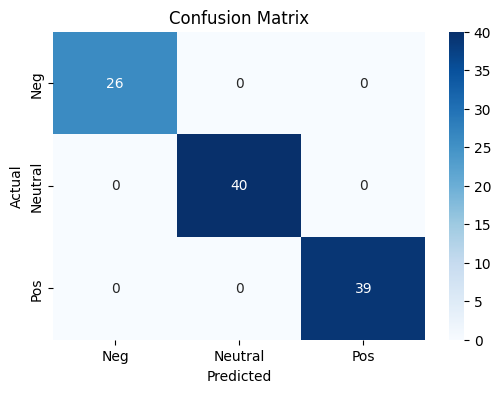

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_cls = clf.predict(X_test_cls)

# Metrics
acc = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_cls))

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg','Neutral','Pos'],
            yticklabels=['Neg','Neutral','Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [30]:
# Features and target for regression
X_reg = model_df.drop(columns=['likesCount', 'log_likes', 'sentiment_category'])
y_reg = model_df['log_likes']  # predict log_likes to handle skew

# Split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Train set size:", X_train_reg.shape)
print("Test set size:", X_test_reg.shape)


Train set size: (417, 9)
Test set size: (105, 9)


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

print("Random Forest regressor trained.")


Random Forest regressor trained.


MAE (log_likes): 0.7352
RMSE (log_likes): 0.9466
R²: 0.2168


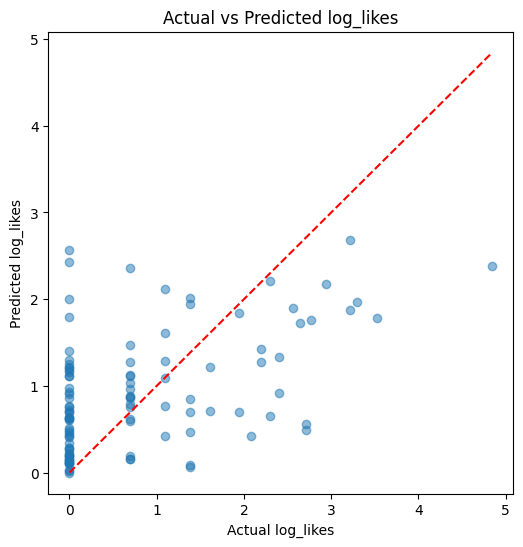

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict
y_pred_reg = reg.predict(X_test_reg)

# Metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE (log_likes): {mae:.4f}")
print(f"RMSE (log_likes): {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual log_likes')
plt.ylabel('Predicted log_likes')
plt.title('Actual vs Predicted log_likes')
plt.show()
